In this homework, we'll be looking at the infamous Titanic dataset. It's become a canonical example for budding data scientists beginning machine learning and will be a good case study in using logistic regression.

From the project description on [Kaggle]('http://www.kaggle.com/c/titanic-gettingStarted'):
###Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

As with any start of a data science problem make sure you import your libraries!

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl

Kaggle has conveniently split the data already into a training set and test set. You can find them in the data folder.

In [2]:
#load data here
titanic_test_df = pd.read_csv('../data/titanic_test.csv')
titanic_training_df = pd.read_csv('../data/titanic_training.csv')

In [3]:
print titanic_test_df.head(10)

   pclass                                          name     sex   age  sibsp  \
0       3                              Kelly, Mr. James    male  34.5      0   
1       3              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2       2                     Myles, Mr. Thomas Francis    male  62.0      0   
3       3                              Wirz, Mr. Albert    male  27.0      0   
4       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   
5       3                    Svensson, Mr. Johan Cervin    male  14.0      0   
6       3                          Connolly, Miss. Kate  female  30.0      0   
7       2                  Caldwell, Mr. Albert Francis    male  26.0      1   
8       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female  18.0      0   
9       3                       Davies, Mr. John Samuel    male  21.0      2   

   parch     ticket     fare cabin embarked  
0      0     330911   7.8292   NaN        Q  
1      0     363272   7.000

In [4]:
titanic_test_df.columns = ["pclass", "name", "sex", "age", "sibsp", "parch", "ticket", "fare", "cabin", "embarked"]
print titanic_test_df.columns 

Index([u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked'], dtype='object')


In [5]:
print titanic_test_df.describe()

           pclass         age       sibsp       parch        fare
count  418.000000  332.000000  418.000000  418.000000  417.000000
mean     2.265550   30.272590    0.447368    0.392344   35.627188
std      0.841838   14.181209    0.896760    0.981429   55.907576
min      1.000000    0.170000    0.000000    0.000000    0.000000
25%      1.000000   21.000000    0.000000    0.000000    7.895800
50%      3.000000   27.000000    0.000000    0.000000   14.454200
75%      3.000000   39.000000    1.000000    0.000000   31.500000
max      3.000000   76.000000    8.000000    9.000000  512.329200


In [6]:
print titanic_test_df.std()

pclass     0.841838
age       14.181209
sibsp      0.896760
parch      0.981429
fare      55.907576
dtype: float64


In [7]:
titanic_test_df.groupby('pclass').pclass.count()

pclass
1         107
2          93
3         218
Name: pclass, dtype: int64

In [8]:
print titanic_training_df.head(10)

   survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   
5         0       3                                   Moran, Mr. James   
6         0       1                            McCarthy, Mr. Timothy J   
7         0       3                     Palsson, Master. Gosta Leonard   
8         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9         1       2                Nasser, Mrs. Nicholas (Adele Achem)   

      sex  age  sibsp  parch            ticket     fare cabin embarked  
0    male   22      1      0         A/5 21171   7.2500   NaN        S  
1  female   38      1      0          P

In [9]:
titanic_training_df.columns = ["survived", "pclass", "name", "sex", "age", "sibsp", "parch", "ticket", "fare", "cabin", "embarked"]
print titanic_training_df.columns 

Index([u'survived', u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked'], dtype='object')


In [19]:
titanic_training_df.groupby('survived').survived.count()

survived
0           549
1           342
Name: survived, dtype: int64

In [20]:
titanic_training_df.groupby('pclass').pclass.count()

pclass
1         216
2         184
3         491
Name: pclass, dtype: int64

#### Notes: Is "pclass" related to "survived"?

While you could analyze this data many different ways, we'll focus on using logistic regression. For a recap of what logistic regression is look [here]('http://blog.yhathq.com/posts/logistic-regression-and-python.html').

Before creating your model, conduct some exploratory data analysis first. Make a few plots and comment on the results. What interesting patterns do you see?

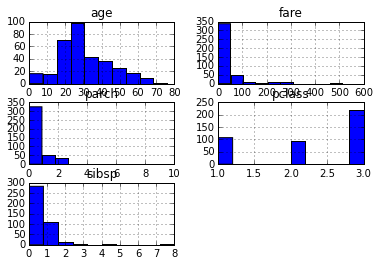

In [10]:
#Code for plot goes here
titanic_test_df.hist()
pl.show()

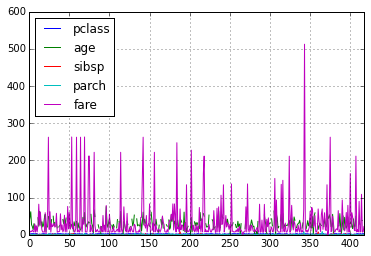

In [17]:
titanic_test_df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ad554d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c2bdb50>]], dtype=object)

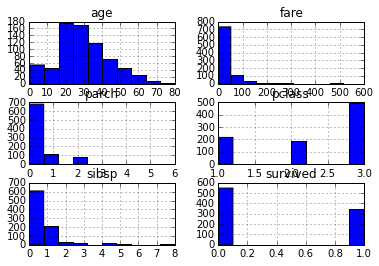

In [22]:
titanic_training_df.hist()

Once you have explored the dataset, begin creating your model. You may want to do several iterations of this experimenting with different combinations of features. 

In [9]:
# Create your model here
# look into .predict


#How do I test my results?
There are two ways to evaluate your model. One is by comparing it to the test set and calculating a prediction accuracy. 

In [10]:
#Calculate prediction accuracy here

(Optional) Another way that you can evaluate, leveraging the fact that this is a Kaggle competition, is to upload your results directly to Kaggle and see how your results stack against all the others who have competed. To submit to Kaggle, you'll have to save the output of your predictions to a CSV file and upload that to the Kaggle Titanic contest page. You'll need a Kaggle account to do this. 

Go to the Kaggle page [here]('http://www.kaggle.com/c/titanic-gettingStarted').

If you do submit on Kaggle, post your Kaggle accuracy on Hipchat and see how you compare to your classmates!

*Note that the format for submission for Kaggle competitions is very strict. Make sure you submit it the way they want it.*

#Notes:
- There is missing data that you may want to remove before you begin running your analysis.
- Beware of overfitting! Sometimes a good prediction accuracy with the test set may not necessarily translate to the best result you would get on Kaggle.
